<a href="https://colab.research.google.com/github/QalbiAlmustikaM/Program/blob/main/Program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
Data = pd.read_csv("Data_Wisataaa.csv")
Data.head()

,Timestamp,Nama,Alamat,Pernah_Berkunjung?,Kepuasan,Komentar,Dokumentasi Saat Berkunjung
0,12/14/2024 11:13,Rais,Parombean,Ya,Puas,Sangat cocok dikunjungi bersama teman dan kelu...,https://drive.google.com/open?id=17TYduO7ZjPKp...
1,12/14/2024 11:18,Armin,Parombean,Ya,Netral,Baik,https://drive.google.com/open?id=1U3OMrKZRgZ36...
2,12/14/2024 12:03,Nahda,Kalosi,Ya,Puas,Luar biasa,https://drive.google.com/open?id=1YV97QEHHevr4...
3,12/14/2024 12:21,Jihan,Parombean,Ya,Puas,"Tempatnya sangat indah, bersih dan sejuk",NaN
4,12/14/2024 12:21,DIEN THAHIRA,BUNTU LIMBONG,Ya,Puas,"Cukup bersih, nyaman dan lengkap.",NaN


In [ ]:
Data.shape #Malihat Jumlah Data

(971, 7)

In [ ]:
Data = pd.read_csv("Data_Wisataaa.csv")
Data[Data["Pernah_Berkunjung?"].str.lower() != "tidak"].to_csv("data_output.csv", index=False)

In [ ]:
Data = pd.read_csv("data_output.csv")

In [ ]:
Data.shape #Malihat Jumlah Data

(955, 7)

In [ ]:
Data = Data[['Timestamp', 'Nama', 'Alamat', 'Kepuasan', 'Komentar']]

In [ ]:
Data.shape

(955, 5)

In [ ]:
# Hapus semua baris yang memiliki Nama dan Alamat duplikat (termasuk komentarnya)
Data = Data.drop_duplicates(subset=['Nama', 'Alamat', 'Kepuasan', 'Komentar'], keep=False)

In [ ]:
Data.shape

(940, 5)

In [ ]:
Data = Data.dropna()

In [ ]:
Data.isnull().sum()

,0
Timestamp,0
Nama,0
Alamat,0
Kepuasan,0
Komentar,0


In [ ]:
Data.shape

(940, 5)

In [ ]:
Data = Data[['Komentar']]
Data

,Komentar
0,Sangat cocok dikunjungi bersama teman dan kelu...
1,Baik
2,Luar biasa
3,"Tempatnya sangat indah, bersih dan sejuk"
4,"Cukup bersih, nyaman dan lengkap."
...,...
950,Pengelolaan yang kurang maksimal membuat penga...
951,Perlu lebih banyak persiapan dan pengawasan da...
952,"Tempat ini indah untuk berfoto, namun sayangny..."
953,Butuh perbaikan!!!!


In [ ]:
Data.shape

(940, 1)

In [ ]:
#Cleansing
def clean_wisata_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?://\S+', '', text)
  text = re.sub(r'\d+', '', text)  # Hapus angka
  text = re.sub(r'[^A-Za-z0-9 ]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()

  return text

Data['Cleansing'] = Data['Komentar'].apply(clean_wisata_text)
Data.head(10)

# Tentukan path output
output_path = "Clensing.csv"

# Simpan DataFrame ke CSV
Data.to_csv(output_path, index=False, encoding='latin1')
Data

,Komentar,Cleansing
0,Sangat cocok dikunjungi bersama teman dan kelu...,Sangat cocok dikunjungi bersama teman dan kelu...
1,Baik,Baik
2,Luar biasa,Luar biasa
3,"Tempatnya sangat indah, bersih dan sejuk",Tempatnya sangat indah bersih dan sejuk
4,"Cukup bersih, nyaman dan lengkap.",Cukup bersih nyaman dan lengkap
...,...,...
950,Pengelolaan yang kurang maksimal membuat penga...,Pengelolaan yang kurang maksimal membuat penga...
951,Perlu lebih banyak persiapan dan pengawasan da...,Perlu lebih banyak persiapan dan pengawasan da...
952,"Tempat ini indah untuk berfoto, namun sayangny...",Tempat ini indah untuk berfoto namun sayangnya...
953,Butuh perbaikan!!!!,Butuh perbaikan


In [ ]:
# Kamus Normalisasi
norm = {
    'bersi': 'bersih',
    'jerni': 'jernih',
    'asrikebersihan': 'asri kebersihan',
    'kenyamananketersediaan': 'kenyamanan ketersediaan',
    'besarAksesibilitas': 'besar aksesibilitas',
    'menantangKeamanan': 'menantang keamanan',
    'pedesaanWisata': 'perdesaan wisata',
    'warungtoiletruang ganti': 'warung, toilet, ruang ganti',
    'nyamanselain': 'nyaman selain',
    'm': '',
    'nya': '',
    'puasnamun': 'puas namun',
    'yg': 'yang',
    'sy': 'saya',
    'safety': 'aman',
    'andil': 'adil',
    'sejukserta': 'sejuk serta',
    'karna': 'karena',
    'keramaiann': 'keramaian',
    'lainnyaKualitas': 'lainnya kualitas',
    'petugaskualitas': 'petugas kualitas',
    'di kembangkanperbaiki': 'dikembangkan atau diperbaiki',
    'sagant': 'sangat',
    'susa': 'sudah',
    'haruss': 'harus',
    'lumayan jauhteruss': 'lumayan jauh terus',
    'masi': 'masih',
    'seruh': 'seru',
    'amankrna': 'aman karena',
    'baguslah': 'bagus',
    'menjual wisata': 'menuju wisata',
    'menakjubkan': 'menakjukkan',
    'blm': 'belum',
    'wisatax': 'wisata',
    'cuku': 'cukup',
    'maling': 'Wai Malino',
    'indahketersediaan': 'indah ketersediaan',
    'temlat': 'tempat',
    'nyapan': 'nyaman',
    'seru': 'seruh',
    'nyamann': 'nyaman',
    'kennyamanan': 'nyaman',
    'nnyaman': 'nyaman',
    'fresh': 'segar',
    'bagusnyamandan': 'bagus, nyaman, dan',
    'kebersihankendala': 'kebersihan, kendala',
    'terbatasdampak': 'terbatas, dampak',
    'infrastrukturkendala': 'infrastruktur, kendala',
    'promosikendala': 'promosi, kendala',
    'masyarakatkendala': 'masyarakat, kendala',
    'pengelolaankendala': 'pengelolaan, kendala',
    'indahbersihasri': 'indah, bersih, asri',
    'wc': 'toilet',
    'bersihnyamanramai': 'bersih, nyaman, ramai',
    'pemandangannnya': 'pemandangannya',
    'disanakita': 'di sana kita',
    'danlingkungannya': 'dan lingkungan',
    'adakenyamanan': 'ada kenyamanan',
    'kem': 'kemping',
    'rama': 'ramah',
    'bengko': 'bengkok',
    'enk': 'enak',
    'jelektapi': 'jelek tetapi',
    'indahvnyaman': 'indah, nyaman',
    'jelekkurang': 'jelek, kurang',
    'bagusjalanya': 'bagus jalannya',
    'tenahg': 'tenang',
    'cam': 'kemping',
    'nyamansuasananya': 'nyaman suasananya',
    'ada pun': 'adapun',
    'karanganwisata': 'Wai Malino',
    'asrih': 'asri',
    'kenyamanannyaman': 'kenyamanan, nyaman',
    'berfotofoto': 'berfoto-foto',
    'acaraacara': 'acara-acara',
    'sejukmengenai': 'sejuk mengenai',
    'diperhatikanbanyak': 'diperhatikan banyak',
    'kanak kanak': 'anak-anak',
    'jauhjalanannya': 'jauh jalanannya',
    'biayaya': 'biayanya',
    'kebersihancukup': 'kebersihan, cukup',
    'bagusindah': 'bagus, indah',
    'pikiranhealing': 'pikiran, healing',
    'sangattttttttttttttt': 'sangat',
    'okeeeeeeeeeeeeeee': 'oke',
    'oky': 'oke',
    'mbaik': 'baik',
    'and then': 'dan',
    'wishlist': 'daftar',
    'bangettt': 'banget',
    'bangttt': 'banget',
    'rusaktempat': 'rusak tempat',
    'rusakk': 'rusak',
    'jauhh': 'jauh',
    'kurangg': 'kurang',
    'tpi': 'tapi',
    'nyamannn': 'nyaman',
    'jelekkk': 'rusak',
    'kayakkk': 'kayak',
    'kamii': 'kami',
    'jelak': 'rusak',
    'bersihhdingin': 'bersih, dingin',
    'jelekk': 'rusak',
    'sma': 'sama',
    'wisatajya': 'wisatanya',
    'sayaa': 'saya',
    'nyamn': 'nyaman',
    'sejuktetapi': 'sejuk tetapi',
    'bagussuruh': 'bagus, suruh',
    'tdk': 'tidak',
    'blum': 'belum',
    'bersihsarana': 'bersih, sarana',
    'malona': 'Malino',
    'rekomend': 'rekomendasi',
    'aplgi': 'apalagi',
    'sekalisangat': 'sangat sekali',
    'sulawesiair': 'Sulawesi, air',
    'sejukdan': 'sejuk dan',
    'tp': 'tapi',
    'terjagasuasananya': 'terjaga suasananya',
    'sejukpokoknyaa': 'sejuk pokoknya',
    'baguss': 'bagus',
    'sangatt': 'sangat',
    'camp': 'kemping',
    'nyamann': 'nyaman',
    'sngt': 'sangat',
    'msi': 'masih',
    'bersantaidan': 'bersantai dan',
    'bersihh': 'bersih',
    'bagusss': 'bagus',
    'karanagan': 'Wai Malino',
    'bersih nyaman': 'bersih, nyaman',
    'bersihnyamanmemiliki': 'bersih, nyaman, memiliki',
    'alamiwisata': 'alami wisata',
    'sejukdisana': 'sejuk di sana',
    'Bagusfasilitas': 'Bagus, fasilitas',
    'lengpak': 'lengkap',
    'sygg': 'sayang',
    'dama': 'sama',
    'memuaskn': 'memuaskan',
    'sawa': 'sawah',
    'karangan': 'wai malino',
    'kemp': 'kemping',
    'pedesaanwisata': 'perdesaan wisata',
    'MenurutkuPetugasnya': 'Menurutku, petugasnya',
    'pelayannnya': 'pelayannya',
    'kerenn': 'keren',
    'bangat': 'banget',
    'dll': 'dan lain-lain',
    'lebi': 'lebih',
    'yng': 'yang',
    'indahbersih': 'indah, bersih',
    'klo': 'kalau',
    'Memuaskn': 'Memuaskan',
    'cokot': 'cocok',
    'bersihnyamanasriindah': 'bersih, nyaman, asri, indah',
    'sawaanakanak': 'anak-anak',
    'wau': 'Wai',
    'bersihcuma': 'bersih cuma',
    'lumayang': 'lumayan',
    'terjaga': 'terjaga',
    'baikketersediaan': 'baik ketersediaan',
    'salasatu': 'sala satu',
    'lingkung': 'lingkungan',
    'cuman': 'cuma',
    'yaman': 'nyaman',
    'pedesaan': 'pedesaan',
    'bersihcuman': 'bersih cuma',
    'keluargasahabatkarna': 'keluarga, sahabat, karena',
    'Rekomen': 'Rekomendasi',
    'recomend': 'rekomendasi',
    'segarwisata': 'segarwisata',
    'bagussejukairnya': 'bagus, sejuk, airnya',
    'bersihdan': 'bersih dan',
    'bersihtapi': 'bersih tapi',
    'syang': 'sayang',
    'baguslingkungan nya': 'bagus lingkungannya',
    'Kebesihansangatt': 'Kebersihan sangat',
    'jernihudaranya': 'jernih, udaranya',
    'bwlum': 'belum',
    'kuranggg': 'kurang',
    'segarwisata': 'segar wisata',
    'keasriannyasejukdan': 'keasriannya, sejuk, dan',
    'bangettttt': 'banget',
    'topp': 'bagus',
    'stress': 'stres',
    'heppy': 'senang',
    'kerennn': 'keren',
    'bangett': 'banget',
    'sgt': 'sangat',
    'derass': 'deras',
    'wissta': 'wisata',
    'wkt': 'waktu',
    'bangetttt': 'banget',
    'nyamanasrisejuk': 'nyaman, asri, sejuk',
    'tapo': 'tapi',

}


# Fungsi normalisasi dengan regex
def normalisasi(str_text):
    str_text = str_text.lower()  # Ubah ke huruf kecil
    words = re.compile(r'\b(' + '|'.join(re.escape(k) for k in norm.keys()) + r')\b')  # Buat pola regex
    return words.sub(lambda x: norm[x.group()], str_text)  # Ganti dengan nilai dari kamus

# Terapkan normalisasi ke DataFrame
Data['Case_Folding'] = Data['Cleansing'].apply(lambda x: normalisasi(x))
Data

,Komentar,Cleansing,Case_Folding
0,Sangat cocok dikunjungi bersama teman dan kelu...,Sangat cocok dikunjungi bersama teman dan kelu...,sangat cocok dikunjungi bersama teman dan kelu...
1,Baik,Baik,baik
2,Luar biasa,Luar biasa,luar biasa
3,"Tempatnya sangat indah, bersih dan sejuk",Tempatnya sangat indah bersih dan sejuk,tempatnya sangat indah bersih dan sejuk
4,"Cukup bersih, nyaman dan lengkap.",Cukup bersih nyaman dan lengkap,"cukup bersih, nyaman dan lengkap"
...,...,...,...
950,Pengelolaan yang kurang maksimal membuat penga...,Pengelolaan yang kurang maksimal membuat penga...,pengelolaan yang kurang maksimal membuat penga...
951,Perlu lebih banyak persiapan dan pengawasan da...,Perlu lebih banyak persiapan dan pengawasan da...,perlu lebih banyak persiapan dan pengawasan da...
952,"Tempat ini indah untuk berfoto, namun sayangny...",Tempat ini indah untuk berfoto namun sayangnya...,tempat ini indah untuk berfoto namun sayangnya...
953,Butuh perbaikan!!!!,Butuh perbaikan,butuh perbaikan


In [ ]:
Data = Data[['Case_Folding']]

output_path = "Case_Folding.csv"
Data.to_csv(output_path, index=False, encoding='latin1')

In [ ]:
# Load data Case_Folding
input_path = "Case_Folding.csv"
Data = pd.read_csv(input_path, encoding='latin1')

# Tokenizing (Memisahkan kata-kata)
Data['Tokenizing'] = Data['Case_Folding'].apply(lambda x: x.split())

# Simpan hasil Tokenizing ke CSV
output_path = "Tokenizing.csv"
Data.to_csv(output_path, index=False, encoding='latin1')
Data

,Case_Folding,Tokenizing
0,sangat cocok dikunjungi bersama teman dan kelu...,"[sangat, cocok, dikunjungi, bersama, teman, da..."
1,baik,[baik]
2,luar biasa,"[luar, biasa]"
3,tempatnya sangat indah bersih dan sejuk,"[tempatnya, sangat, indah, bersih, dan, sejuk]"
4,"cukup bersih, nyaman dan lengkap","[cukup, bersih,, nyaman, dan, lengkap]"
...,...,...
935,pengelolaan yang kurang maksimal membuat penga...,"[pengelolaan, yang, kurang, maksimal, membuat,..."
936,perlu lebih banyak persiapan dan pengawasan da...,"[perlu, lebih, banyak, persiapan, dan, pengawa..."
937,tempat ini indah untuk berfoto namun sayangnya...,"[tempat, ini, indah, untuk, berfoto, namun, sa..."
938,butuh perbaikan,"[butuh, perbaikan]"


In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.2 MB/s eta 0:00:00


In [ ]:
# Buat stopword remover
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
stop_factory = StopWordRemoverFactory()
stopword = stop_factory.create_stop_word_remover()

# Fungsi untuk menghapus stopword dan tetap dalam bentuk list token
def remove_stopwords(token_list):
    text = " ".join(token_list)  # Gabungkan kembali ke string
    cleaned_text = stopword.remove(text)  # Hapus stopword
    return cleaned_text.split()  # Pecah kembali menjadi token list

# Terapkan Stopword Removal
Data['Stopword_Removal'] = Data['Tokenizing'].apply(remove_stopwords)

# # Fungsi untuk menghapus stopword
# def remove_stopwords(token_list):
#     text = " ".join(token_list)  # Gabungkan kembali ke string
#     return stopword.remove(text)  # Hapus stopword

# # Terapkan Stopword Removal
# Data['Stopword_Removal'] = Data['Tokenizing'].apply(remove_stopwords)


# Simpan hasil Tokenizing ke CSV
output_path = "Stopword_Removal.csv"
Data.to_csv(output_path, index=False, encoding='latin1')
Data

,Case_Folding,Tokenizing,Stopword_Removal
0,sangat cocok dikunjungi bersama teman dan kelu...,"[sangat, cocok, dikunjungi, bersama, teman, da...","[sangat, cocok, dikunjungi, bersama, teman, ke..."
1,baik,[baik],[baik]
2,luar biasa,"[luar, biasa]","[luar, biasa]"
3,tempatnya sangat indah bersih dan sejuk,"[tempatnya, sangat, indah, bersih, dan, sejuk]","[tempatnya, sangat, indah, bersih, sejuk]"
4,"cukup bersih, nyaman dan lengkap","[cukup, bersih,, nyaman, dan, lengkap]","[cukup, bersih,, nyaman, lengkap]"
...,...,...,...
935,pengelolaan yang kurang maksimal membuat penga...,"[pengelolaan, yang, kurang, maksimal, membuat,...","[pengelolaan, kurang, maksimal, membuat, penga..."
936,perlu lebih banyak persiapan dan pengawasan da...,"[perlu, lebih, banyak, persiapan, dan, pengawa...","[perlu, lebih, banyak, persiapan, pengawasan, ..."
937,tempat ini indah untuk berfoto namun sayangnya...,"[tempat, ini, indah, untuk, berfoto, namun, sa...","[tempat, indah, berfoto, sayangnya, fasilitas,..."
938,butuh perbaikan,"[butuh, perbaikan]","[butuh, perbaikan]"


In [ ]:
#Stemming
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Load Data
file_path = "Stopword_Removal.csv"  # Sesuaikan lokasi file
Data = pd.read_csv(file_path)

# Pastikan kolom `Stopword_Removal` sudah dalam bentuk list
def convert_to_list(text):
    return eval(text) if isinstance(text, str) and text.startswith("[") else text

Data['Stopword_Removal'] = Data['Stopword_Removal'].apply(convert_to_list)

# Buat Stemmer
stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()

# Fungsi Stemming
def stemming(text_cleaning):
    return [stemmer.stem(word) for word in text_cleaning] if isinstance(text_cleaning, list) else text_cleaning

# Terapkan Stemming
Data['Stemming'] = Data['Stopword_Removal'].apply(stemming)

# Simpan hasil ke CSV
Data.to_csv("hasil_stemming.csv", index=False)
Data

,Case_Folding,Tokenizing,Stopword_Removal,Stemming
0,sangat cocok dikunjungi bersama teman dan kelu...,"['sangat', 'cocok', 'dikunjungi', 'bersama', '...","[sangat, cocok, dikunjungi, bersama, teman, ke...","[sangat, cocok, kunjung, sama, teman, keluarga]"
1,baik,['baik'],[baik],[baik]
2,luar biasa,"['luar', 'biasa']","[luar, biasa]","[luar, biasa]"
3,tempatnya sangat indah bersih dan sejuk,"['tempatnya', 'sangat', 'indah', 'bersih', 'da...","[tempatnya, sangat, indah, bersih, sejuk]","[tempat, sangat, indah, bersih, sejuk]"
4,"cukup bersih, nyaman dan lengkap","['cukup', 'bersih,', 'nyaman', 'dan', 'lengkap']","[cukup, bersih,, nyaman, lengkap]","[cukup, bersih, nyaman, lengkap]"
...,...,...,...,...
935,pengelolaan yang kurang maksimal membuat penga...,"['pengelolaan', 'yang', 'kurang', 'maksimal', ...","[pengelolaan, kurang, maksimal, membuat, penga...","[kelola, kurang, maksimal, buat, alam, jadi, k..."
936,perlu lebih banyak persiapan dan pengawasan da...,"['perlu', 'lebih', 'banyak', 'persiapan', 'dan...","[perlu, lebih, banyak, persiapan, pengawasan, ...","[perlu, lebih, banyak, siap, awas, pandu]"
937,tempat ini indah untuk berfoto namun sayangnya...,"['tempat', 'ini', 'indah', 'untuk', 'berfoto',...","[tempat, indah, berfoto, sayangnya, fasilitas,...","[tempat, indah, foto, sayang, fasilitas, publi..."
938,butuh perbaikan,"['butuh', 'perbaikan']","[butuh, perbaikan]","[butuh, baik]"


In [ ]:
Data[['Stemming']].to_csv('stemming.csv', index=False)

In [ ]:
import pandas as pd
from collections import Counter

file_data = "stemming.csv"
Data = pd.read_csv(file_data)

# Perbaiki format teks jika berbentuk list string
Data['Stemming'] = Data['Stemming'].apply(lambda x: " ".join(eval(x)) if isinstance(x, str) and x.startswith("[") else x)
Data['Stemming'] = Data['Stemming'].astype(str).str.lower()

# Baca kamus lexicon dengan skor
file_positif = "positive.csv"
file_negatif = "negative.csv"


positive_lexicon = pd.read_csv(file_positif, header=None, names=['word', 'score'])
negative_lexicon = pd.read_csv(file_negatif, header=None, names=['word', 'score'])

# Simpan dalam dictionary untuk akses cepat
positive_dict = dict(zip(positive_lexicon['word'].str.lower(), positive_lexicon['score']))
negative_dict = dict(zip(negative_lexicon['word'].str.lower(), negative_lexicon['score']))

# Fungsi Analisis Sentimen dengan Skor dari Kamus Lexicon
def sentiment_analysis(text):
    words = text.split()
    word_counts = Counter(words)  # Hitung jumlah kemunculan kata

    total_score = 0
    words_with_scores = []

    for word, count in word_counts.items():
        if word in positive_dict:
            score = positive_dict[word] * count  # Gunakan skor dari kamus positif
            total_score += score
            words_with_scores.append(f"{word} (+{score})")
        elif word in negative_dict:
            score = negative_dict[word] * count  # Gunakan skor dari kamus negatif
            total_score += score
            words_with_scores.append(f"{word} ({score})")

    # Tentukan label berdasarkan total skor
    label = "Positive" if total_score > 0 else "Negative" if total_score < 0 else "Neutral"

    # Gabungkan kata dan skor dalam satu kolom
    combined_text = ", ".join(words_with_scores)

    return combined_text, total_score, label

# Terapkan Analisis Sentimen
Data[['Words (Score)', 'Total Score', 'Label']] = \
    Data['Stemming'].apply(sentiment_analysis).apply(pd.Series)

# Cetak Hasil Berjejer ke Samping
print("\n Hasil Analisis Sentimen:")
print(Data.head(10).to_string(index=False))  # Cetak dalam satu baris per data

# Simpan hasil ke file CSV
output_file = "Pelabelan_Lexicon.csv"
Data.to_csv(output_file, index=False)

# Tampilkan Distribusi Sentimen
print("\nDistribusi Sentimen:")
print(Data['Label'].value_counts().to_string())  # Tampilkan hasil distribusi dalam satu baris



 Hasil Analisis Sentimen:
                                                         Stemming                                                               Words (Score)  Total Score    Label
                         sangat cocok kunjung sama teman keluarga             sangat (+3), cocok (+4), kunjung (+3), sama (+3), keluarga (+4)           17 Positive
                                                             baik                                                                   baik (+3)            3 Positive
                                                       luar biasa                                                                  biasa (+2)            2 Positive
                                 tempat sangat indah bersih sejuk                                        tempat (-3), sangat (+3), indah (+3)            3 Positive
                                      cukup bersih nyaman lengkap                                       cukup (-5), nyaman (+4), lengkap (+2)            

In [ ]:
# Export to csv file
Data.to_csv("Pelabelan_Lexicon.csv", index=False, header=True, index_label=None)
Data

,Stemming,Words (Score),Total Score,Label
0,sangat cocok kunjung sama teman keluarga,"sangat (+3), cocok (+4), kunjung (+3), sama (+...",17,Positive
1,baik,baik (+3),3,Positive
2,luar biasa,biasa (+2),2,Positive
3,tempat sangat indah bersih sejuk,"tempat (-3), sangat (+3), indah (+3)",3,Positive
4,cukup bersih nyaman lengkap,"cukup (-5), nyaman (+4), lengkap (+2)",1,Positive
...,...,...,...,...
935,kelola kurang maksimal buat alam jadi kurang o...,"kurang (-6), maksimal (+3), buat (+1), alam (+...",1,Positive
936,perlu lebih banyak siap awas pandu,"perlu (+2), lebih (+1), banyak (+3), siap (+1)...",14,Positive
937,tempat indah foto sayang fasilitas publik pada,"tempat (-3), indah (+3), foto (+3), sayang (+3...",5,Positive
938,butuh baik,"butuh (-5), baik (+3)",-2,Negative


In [ ]:
Data = pd.read_csv("Pelabelan_Lexicon.csv")  # Ganti "data.csv" dengan nama file Anda

# Mapping label ke angka
label_mapping = {'Positive': 1, 'Negative': -1, 'Neutral': 0}

# Mengubah hanya kolom "Label"
if 'Label' in Data.columns:
    Data['Label'] = Data['Label'].map(label_mapping)

# Menyimpan kembali ke CSV setelah konversi
Data.to_csv("data_convers.csv", index=False)
Data

,Stemming,Words (Score),Total Score,Label
0,sangat cocok kunjung sama teman keluarga,"sangat (+3), cocok (+4), kunjung (+3), sama (+...",17,1
1,baik,baik (+3),3,1
2,luar biasa,biasa (+2),2,1
3,tempat sangat indah bersih sejuk,"tempat (-3), sangat (+3), indah (+3)",3,1
4,cukup bersih nyaman lengkap,"cukup (-5), nyaman (+4), lengkap (+2)",1,1
...,...,...,...,...
935,kelola kurang maksimal buat alam jadi kurang o...,"kurang (-6), maksimal (+3), buat (+1), alam (+...",1,1
936,perlu lebih banyak siap awas pandu,"perlu (+2), lebih (+1), banyak (+3), siap (+1)...",14,1
937,tempat indah foto sayang fasilitas publik pada,"tempat (-3), indah (+3), foto (+3), sayang (+3...",5,1
938,butuh baik,"butuh (-5), baik (+3)",-2,-1


Label
 1    676
-1    195
 0     69
Name: count, dtype: int64


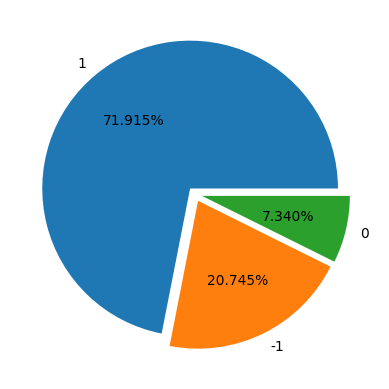

In [ ]:
import matplotlib.pyplot as plt

label_data = Data['Label'].value_counts()

print(label_data)

# pie chart sedikit terpisah
explode = [0.05] * len(label_data)

# Membuat pie chart
plt.pie(label_data, labels=label_data.index, autopct="%.3f%%", explode=explode)
plt.show()


In [ ]:
Data = pd.read_csv('data_convers.csv')
Data

,Stemming,Words (Score),Total Score,Label
0,sangat cocok kunjung sama teman keluarga,"sangat (+3), cocok (+4), kunjung (+3), sama (+...",17,1
1,baik,baik (+3),3,1
2,luar biasa,biasa (+2),2,1
3,tempat sangat indah bersih sejuk,"tempat (-3), sangat (+3), indah (+3)",3,1
4,cukup bersih nyaman lengkap,"cukup (-5), nyaman (+4), lengkap (+2)",1,1
...,...,...,...,...
935,kelola kurang maksimal buat alam jadi kurang o...,"kurang (-6), maksimal (+3), buat (+1), alam (+...",1,1
936,perlu lebih banyak siap awas pandu,"perlu (+2), lebih (+1), banyak (+3), siap (+1)...",14,1
937,tempat indah foto sayang fasilitas publik pada,"tempat (-3), indah (+3), foto (+3), sayang (+3...",5,1
938,butuh baik,"butuh (-5), baik (+3)",-2,-1


In [ ]:
Data.shape

(940, 4)

In [ ]:
import random
import csv

# Konfigurasi
input_file = "data_convers.csv"  # Ganti dengan nama file Anda
train_file = "train_data.csv" #nama file untuk menyimpan data pelatihan
test_file = "test_data.csv"
train_ratio = 0.8  # 80% untuk training, 20% untuk testing
random_seed = 42  # Seed untuk hasil acak yang konsisten

# Membaca data dari CSV
with open(input_file, 'r', encoding='utf-8') as file:
    csv_reader = csv.reader(file)
    header = next(csv_reader)  # Membaca header
    data = list(csv_reader)    # Membaca semua data

# Menemukan indeks kolom "Label"
label_index = header.index("Label")

# Memisahkan data berdasarkan label
positif_data = [row for row in data if row[label_index] == '1']
negative_data = [row for row in data if row[label_index] == '-1']
neutral_data = [row for row in data if row[label_index] == '0']

# Mengacak data untuk setiap label
random.seed(random_seed)
random.shuffle(positif_data)
random.shuffle(negative_data)
random.shuffle(neutral_data)

# Menentukan titik pembagian untuk setiap label
split_point_positif = int(len(positif_data) * train_ratio)
split_point_negative = int(len(negative_data) * train_ratio)
split_point_neutral = int(len(neutral_data) * train_ratio)

# Membagi data untuk setiap label
train_positif = positif_data[:split_point_positif]
test_positif = positif_data[split_point_positif:]

train_negative = negative_data[:split_point_negative]
test_negative = negative_data[split_point_negative:]

train_neutral = neutral_data[:split_point_neutral]
test_neutral = neutral_data[split_point_neutral:]

# Menulis data training dan testing untuk setiap label ke file
with open(train_file, 'w', encoding='utf-8', newline='') as file:
    csv_writer = csv.writer(file)
    csv_writer.writerow(header)  # Menulis header
    csv_writer.writerows(train_positif)  # Menulis data training untuk label positif
    csv_writer.writerows(train_negative)  # Menulis data training untuk label -1
    csv_writer.writerows(train_neutral)  # Menulis data training untuk label 0

with open(test_file, 'w', encoding='utf-8', newline='') as file:
    csv_writer = csv.writer(file)
    csv_writer.writerow(header)  # Menulis header
    csv_writer.writerows(test_positif)  # Menulis data testing untuk label positif
    csv_writer.writerows(test_negative)  # Menulis data testing untuk label -1
    csv_writer.writerows(test_neutral)  # Menulis data testing untuk label 0

# Menampilkan hasil
print(f"\nPembagian data selesai!")
print(f"Total data: {len(data)}")
print(f"Data training: {len(train_positif) + len(train_negative) + len(train_neutral)} baris ({train_ratio*100}%)")
print(f"Data testing: {len(test_positif) + len(test_negative) + len(test_neutral)} baris ({(1-train_ratio)*100}%)")


Pembagian data selesai!
Total data: 940
Data training: 751 baris (80.0%)
Data testing: 189 baris (19.999999999999996%)


#Naive Bayes

In [ ]:
from collections import defaultdict
class NaiveBayes:
    def __init__(self):
        """Inisialisasi model dengan menyimpan probabilitas kelas dan kata-kata."""
        self.probabilitas_kelas = {}  # P(H) = Peluang kelas
        self.probabilitas_kata = defaultdict(lambda: defaultdict(float))  # P(X|H) = Peluang kata dalam kelas
        self.kata_unik = set()  # Semua kata yang muncul dalam dataset

    def bersihkan_teks(self, teks):
        """membaginya menjadi kata-kata."""
        return teks.lower().split()

    def muat_data_csv(self, nama_file, kolom_teks, kolom_label):
        """Membaca data dari file CSV dan mengambil teks serta labelnya."""
        daftar_teks, daftar_label = [], []
        with open(nama_file, 'r', encoding='utf-8') as file:
            pembaca_csv = csv.DictReader(file)
            for baris in pembaca_csv:
                daftar_teks.append(baris[kolom_teks])
                daftar_label.append(int(baris[kolom_label]))
        return daftar_teks, daftar_label

    def latih_model(self, daftar_teks, daftar_label):
        """Melatih model dengan menghitung probabilitas kelas dan kata."""
        jumlah_data = len(daftar_teks)  # Total jumlah dokumen
        jumlah_per_kelas = defaultdict(int)  # Menghitung jumlah dokumen per kelas

        for label in daftar_label:
            jumlah_per_kelas[label] += 1

        for label, jumlah in jumlah_per_kelas.items():
            self.probabilitas_kelas[label] = jumlah / jumlah_data  # P(H) = Jumlah kelas / Total data

        jumlah_kata_per_kelas = defaultdict(lambda: defaultdict(int))
        total_kata_per_kelas = defaultdict(int)

        # menghitung frekuensi kata dalam data pelatihan yang sudah diberi label
        for teks, label in zip(daftar_teks, daftar_label):
            kata_kata = self.bersihkan_teks(teks)
            for kata in kata_kata: #menghitung probabilitas kemunculan kata tertentu dalam kelas tertentu.
                jumlah_kata_per_kelas[label][kata] += 1
                total_kata_per_kelas[label] += 1
                self.kata_unik.add(kata)

        #Menghitung jumlah kata unik yang telah ditemukan dalam seluruh data pelatihan dan menyimpannya ke variabel ukuran_kamus.
        ukuran_kamus = len(self.kata_unik)

        for label in jumlah_per_kelas.keys():
            total_kata = total_kata_per_kelas[label]
            for kata in self.kata_unik:
                jumlah = jumlah_kata_per_kelas[label][kata]
                self.probabilitas_kata[label][kata] = (jumlah + 1) / (total_kata + ukuran_kamus)  # P(X|H)

    def prediksi(self, teks):
        """Memprediksi kelas berdasarkan teks input."""
        kata_kata = self.bersihkan_teks(teks)
        hasil_kemungkinan = {} # inisialisai untuk menyimpan

        for label in self.probabilitas_kelas.keys():
            peluang = self.probabilitas_kelas[label]  # P(H)
            for kata in kata_kata:
                if kata in self.kata_unik:
                    peluang *= self.probabilitas_kata[label][kata]  # P(H|X) = P(X|H) * P(H)
            hasil_kemungkinan[label] = peluang

        return max(hasil_kemungkinan, key=hasil_kemungkinan.get)  # Pilih kelas dengan probabilitas tertinggi

    def evaluasi(self, daftar_teks, daftar_label):
        """Menghitung akurasi model."""
        prediksi = [self.prediksi(teks) for teks in daftar_teks]
        benar = sum(1 for pred, asli in zip(prediksi, daftar_label) if pred == asli)
        akurasi = benar / len(daftar_label)
        return akurasi, prediksi

# Fungsi utama untuk menjalankan program
def main():
    file_latih = "train_data.csv"
    file_uji = "test_data.csv"
    kolom_teks = "Stemming"
    kolom_label = "Label"

    model = NaiveBayes()
    teks_latih, label_latih = model.muat_data_csv(file_latih, kolom_teks, kolom_label)
    teks_uji, label_uji = model.muat_data_csv(file_uji, kolom_teks, kolom_label)

    model.latih_model(teks_latih, label_latih)
    akurasi, hasil_prediksi = model.evaluasi(teks_uji, label_uji)

    print(f"Akurasi Model: {akurasi:.2%}")

    with open("akurasi.txt", "w") as f:
        f.write(f"{akurasi:.4f}")

    with open("Prediksi_Naive_Bayes.csv", "w", newline='', encoding='utf-8') as f:
        penulis = csv.writer(f)
        penulis.writerow(["Teks", "Label Asli", "Prediksi"])
        for teks, label_asli, label_prediksi in zip(teks_uji, label_uji, hasil_prediksi):
            penulis.writerow([teks, label_asli, label_prediksi])

if __name__ == "__main__":
    main()

Akurasi Model: 80.42%


Confusion Matrix:
[[133   3   0]
 [ 20  19   0]
 [ 14   0   0]]
Accuracy: 80.42%
Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.98      0.88       136
          -1       0.86      0.49      0.62        39
           0       1.00      0.00      0.00        14

    accuracy                           0.80       189
   macro avg       0.89      0.49      0.50       189
weighted avg       0.83      0.80      0.76       189



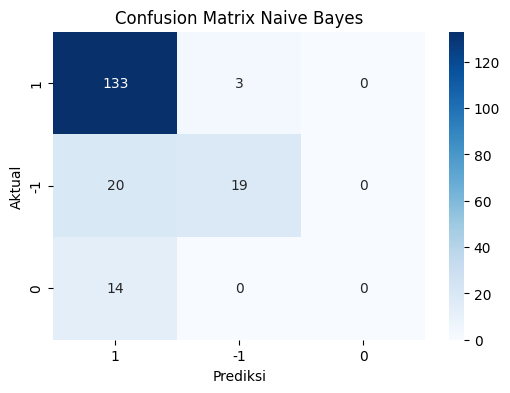

In [ ]:
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def load_predictions(file_path):
    """
    Muat label asli dan label prediksi dari file CSV
    """
    true_labels = []
    pred_labels = []

    with open(file_path, 'r', encoding='utf-8') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Lewati header
        for row in csv_reader:
            if len(row) < 3:
                continue  # Lewati baris tidak valid
            true_labels.append(row[1])  # Label Asli
            pred_labels.append(row[2])  # Label Prediksi

    return true_labels, pred_labels

def plot_confusion_matrix(true_labels, pred_labels):
    """
    Plot confusion matrix menggunakan heatmap seaborn
    """
    labels = ["1", "-1", "0"]  # Urutan sesuai permintaan
    cm = confusion_matrix(true_labels, pred_labels, labels=labels)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Prediksi")
    plt.ylabel("Aktual")
    plt.title("Confusion Matrix Naive Bayes")
    plt.show()

def main():
    input_file = "Prediksi_Naive_Bayes.csv"  # Sesuaikan dengan nama file hasil prediksi
    try:
        true_labels, pred_labels = load_predictions(input_file)

        # Hitung Confusion Matrix
        print("Confusion Matrix:")
        cm = confusion_matrix(true_labels, pred_labels, labels=["1", "-1", "0"])
        print(cm)

        # Hitung dan tampilkan akurasi
        accuracy = accuracy_score(true_labels, pred_labels)
        print(f"Accuracy: {accuracy:.2%}")

        # Gunakan `zero_division=1` agar tidak ada peringatan
        print("Classification Report:")
        print(classification_report(true_labels, pred_labels, labels=["1", "-1", "0"], zero_division=1))

        # Tampilkan plot confusion matrix
        plot_confusion_matrix(true_labels, pred_labels)

    except FileNotFoundError:
        print(f"Error: File {input_file} not found.")
    except Exception as e:
        print(f"Error: {str(e)}")

if __name__ == "__main__":
    main()

#Random Forest

In [ ]:
import csv
import numpy as np
import pandas as pd
from collections import Counter
import math
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [ ]:
# -------------------------------
# Fungsi untuk memuat data CSV
# -------------------------------
def load_csv_data(file_path, text_column, label_column):
    """
    Memuat data dari file CSV dan mengembalikan list teks dan label.
    """
    texts = []
    labels = []
    with open(file_path, 'r', encoding='utf-8') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            if row[text_column] and row[label_column]:
                texts.append(row[text_column])
                labels.append(int(row[label_column]))  # Pastikan label berupa integer
    return texts, labels

# -------------------------------
# Fungsi untuk menghitung entropi
# -------------------------------
def entropi(y):
    """
    Menghitung entropi dari vektor label y.
    """
    y = np.array(y) # y, array berisi nilai kelas atau label
    if len(y) == 0:
        return 0 # jika tdk ada data maka entropynya 0

    _, jumlah = np.unique(y, return_counts=True)
    # Menghitung probabilitas dari masing-masing label
    probabilitas = jumlah / len(y) # len(y) jumlah keseluruhan label

    # Rumus entropi: -∑ (p * log2(p))
    return -np.sum(probabilitas * np.log2(probabilitas))

# -------------------------------
# Fungsi untuk menghitung informasi Gini (menggunakan entropi)
# -------------------------------
def informasi_gini(y, y_kiri, y_kanan):
    entropi_awal = entropi(y)
    bobot_kiri = len(y_kiri) / len(y) # len(y) jumlah keseluruhan label
    bobot_kanan = len(y_kanan) / len(y)
    return entropi_awal - (bobot_kiri * entropi(y_kiri) + bobot_kanan * entropi(y_kanan))

# -------------------------------
# Fungsi untuk mencari pemisahan (split) terbaik
# x fitur dan y label
# -------------------------------
def cari_split_terbaik(X, y, jumlah_fitur_maks):
    jumlah_fitur = X.shape[1]
    indeks_fitur = np.random.choice(jumlah_fitur, size=jumlah_fitur_maks, replace=False) #memilih fitur secara acak
    fitur_terbaik = None
    ambang_terbaik = None
    gini_terbaik = 0 # menyimpan nilai Gini impurity tertinggi

    for fitur in indeks_fitur:
        ambang_list = np.unique(X[:, fitur])
        for ambang in ambang_list: #Loop lagi untuk mencoba semua ambang batas (threshold) dari fitur yang sedang diperiksa.
            indeks_kiri = X[:, fitur] <= ambang
            indeks_kanan = ~indeks_kiri

            if np.sum(indeks_kiri) == 0 or np.sum(indeks_kanan) == 0:
                continue #Jika nilainya kosong maka di lewati

            #untuk menghitung nilai Gini impurity dari pembagian kiri-kanan tersebut.
            gini = informasi_gini(y, y[indeks_kiri], y[indeks_kanan])
            if gini > gini_terbaik:
                gini_terbaik = gini
                fitur_terbaik = fitur
                ambang_terbaik = ambang

    return fitur_terbaik, ambang_terbaik

# -------------------------------
# Fungsi untuk membangun pohon keputusan (Decision Tree) secara rekursif
# -------------------------------
def bangun_pohon_keputusan(X_latih, y_latih, batas_kedalaman=None, jumlah_fitur_maks=None):
    # Inisialisasi pohon sebagai dictionary untuk menyimpan informasi
    pohon = {'fitur': None, 'ambang': None, 'kiri': None, 'kanan': None, 'label': None}

    # nilai kedalaman o maka berhenti & label nya akan terbentuk
    if batas_kedalaman == 0 or len(set(y_latih)) == 1: #panjang 1 maka kelasnya sama
        pohon['label'] = Counter(y_latih).most_common(1)[0][0] # mengambil label yang paling sering muncul.
        return pohon

    # Tentukan jumlah fitur maksimal
    if jumlah_fitur_maks is None:
        jumlah_fitur_maks = int(np.sqrt(X_latih.shape[1]))  # Default

    # mencari fitur terbaik dan ambang batasnya (nilai threshold)
    fitur_terbaik, ambang_terbaik = cari_split_terbaik(X_latih, y_latih, jumlah_fitur_maks)
    if fitur_terbaik is None: #Jika tidak ditemukan fitur terbaik untuk membagi data, maka simpul pohon berhenti.&
        pohon['label'] = Counter(y_latih).most_common(1)[0][0] # mengambil label yang paling sering muncul.
        return pohon

    # membagi data menjadi dua
    indeks_kiri = X_latih[:, fitur_terbaik] <= ambang_terbaik
    indeks_kanan = ~indeks_kiri

    #batas kedaaman - 1 ialah kurangi 1 setiap kali turun ke cabang berikutnya,
    pohon['fitur'] = fitur_terbaik
    pohon['ambang'] = ambang_terbaik
    pohon['kiri'] = bangun_pohon_keputusan(X_latih[indeks_kiri], np.array(y_latih)[indeks_kiri],
                                           batas_kedalaman - 1 if batas_kedalaman is not None else None,
                                           jumlah_fitur_maks)
    pohon['kanan'] = bangun_pohon_keputusan(X_latih[indeks_kanan], np.array(y_latih)[indeks_kanan],
                                            batas_kedalaman - 1 if batas_kedalaman is not None else None,
                                            jumlah_fitur_maks)

    return pohon

# -------------------------------
# Fungsi prediksi dengan pohon keputusan
# -------------------------------
def prediksi_pohon(pohon, x):
    if pohon['label'] is not None: #Jika node ini adalah daun (leaf), langsung kembalikan label prediksinya.
        return pohon['label']
    if pohon['fitur'] is None or pohon['ambang'] is None: #Jika struktur node tidak lengkap maka kembali ke node
        return None
    if x[pohon['fitur']] <= pohon['ambang']:
        return prediksi_pohon(pohon['kiri'], x) # x adalah satu data input yg ingin di prediksi
    else:
        return prediksi_pohon(pohon['kanan'], x)

# -------------------------------
# Fungsi pelatihan Random Forest
# -------------------------------
def latih_random_forest(X_latih, y_latih, jumlah_pohon=10, kedalaman_maks=None):
    hutan = [] #menyimpan pohon-pohon keputusan

    # Loop untuk membuat pohon keputusan sebanyak jumlah_pohon
    for _ in range(jumlah_pohon):
        # Mengambil sampel acak dengan pengembalian
        indeks = np.random.choice(len(X_latih), size=len(X_latih), replace=True)

        # Membuat subset data latih berdasarkan indeks yang dipilih
        X_subset = X_latih[indeks]
        y_subset = np.array(y_latih)[indeks]

        # Membangun pohon keputusan untuk subset yang telah diambil
        pohon = bangun_pohon_keputusan(X_subset, y_subset, kedalaman_maks)
        hutan.append(pohon) #  # Menyimpan pohon yang telah dibangun ke dalam list hutan
    return hutan

# -------------------------------
# Fungsi prediksi dengan Random Forest
# -------------------------------
def prediksi_random_forest(hutan, X_uji):
    prediksi = [] #menyimpan prediksi
    for x in X_uji: #prediksi untuk setiap x, yaitu satu data uji.
        prediksi_pohon_list = [prediksi_pohon(pohon, x) for pohon in hutan] #Memanggil fungsi untuk setiap pohon dalam hutan
        mayoritas = Counter(prediksi_pohon_list).most_common(1)[0][0] #  mencari label
        prediksi.append(mayoritas) # majority voting
    return prediksi

# -------------------------------
# Program Utama
# -------------------------------
def main():
    # Nama file data training dan testing
    train_file = "train_data.csv"  # File training sudah tersedia
    test_file = "test_data.csv"    # File testing sudah tersedia
    text_column = "Stemming"
    label_column = "Label"

    # Muat data training dan testing
    train_texts, train_labels = load_csv_data(train_file, text_column, label_column)
    test_texts, test_labels = load_csv_data(test_file, text_column, label_column)

    # Hitung TF-IDF menggunakan CountVectorizer dan TfidfTransformer
    count_vectorizer = CountVectorizer()
    train_counts = count_vectorizer.fit_transform(train_texts)
    test_counts = count_vectorizer.transform(test_texts)
    fitur = count_vectorizer.get_feature_names_out()

    tfidf_transform = TfidfTransformer()
    train_tfidf = tfidf_transform.fit_transform(train_counts).toarray()
    test_tfidf = tfidf_transform.transform(test_counts).toarray()

    # Tampilkan contoh hasil TF-IDF dalam DataFrame
    df_tfidf = pd.DataFrame(data=train_tfidf, columns=fitur)

    # Melatih Random Forest menggunakan implementasi manual
    trees = latih_random_forest(train_tfidf, np.array(train_labels), jumlah_pohon=10, kedalaman_maks=5)

    # Melakukan prediksi pada data testing
    predictions = prediksi_random_forest(trees, test_tfidf)
    accuracy = np.mean(np.array(predictions) == np.array(test_labels)) * 100
    print(f"Accuracy: {accuracy:.2f}%")

    # Simpan hasil prediksi beserta label aktual dan kolom 'Stemming' ke file CSV
    predictions_df = pd.DataFrame({
        "Komentar": test_texts,
        "Actual": test_labels,
        "Prediksi": predictions
    })

    predictions_df.to_csv("Random_Forest.csv", index=False)

if __name__ == "__main__":
    main()

Accuracy: 71.96%


Confusion Matrix:
[[136   0   0]
 [ 39   0   0]
 [ 14   0   0]]
Accuracy: 71.96%
Classification Report:
              precision    recall  f1-score   support

           1       0.72      1.00      0.84       136
          -1       1.00      0.00      0.00        39
           0       1.00      0.00      0.00        14

    accuracy                           0.72       189
   macro avg       0.91      0.33      0.28       189
weighted avg       0.80      0.72      0.60       189



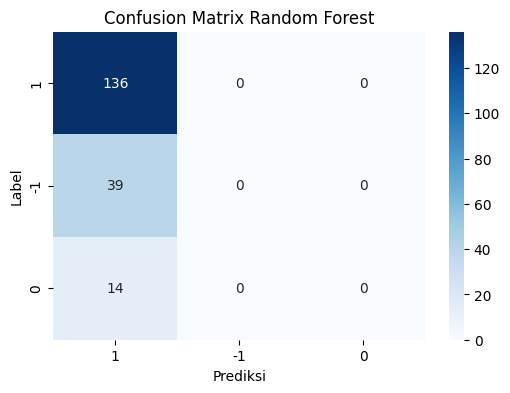

In [ ]:
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def load_predictions(file_path):
    """
    Muat label asli dan label prediksi dari file CSV
    """
    true_labels = []
    pred_labels = []

    with open(file_path, 'r', encoding='utf-8') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Lewati header
        for row in csv_reader:
            if len(row) < 3:
                continue  # Lewati baris tidak valid
            true_labels.append(row[1])  # Label Asli
            pred_labels.append(row[2])  # Label Prediksi

    return true_labels, pred_labels

def plot_confusion_matrix(true_labels, pred_labels):
    """
    Plot confusion matrix menggunakan heatmap seaborn
    """
    labels = ["1", "-1", "0"]  # Urutan sesuai permintaan
    cm = confusion_matrix(true_labels, pred_labels, labels=labels)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Prediksi")
    plt.ylabel("Label")
    plt.title("Confusion Matrix Random Forest")
    plt.show()

def main():
    input_file = "Random_Forest.csv"  # Sesuaikan dengan nama file hasil prediksi
    try:
        true_labels, pred_labels = load_predictions(input_file)

        # Hitung Confusion Matrix
        print("Confusion Matrix:")
        cm = confusion_matrix(true_labels, pred_labels, labels=["1", "-1", "0"])
        print(cm)

        # Hitung dan tampilkan akurasi
        accuracy = accuracy_score(true_labels, pred_labels)
        print(f"Accuracy: {accuracy:.2%}")

        # Gunakan `zero_division=1` agar tidak ada peringatan
        print("Classification Report:")
        print(classification_report(true_labels, pred_labels, labels=["1", "-1", "0"], zero_division=1))

        # Tampilkan plot confusion matrix
        plot_confusion_matrix(true_labels, pred_labels)

    except FileNotFoundError:
        print(f"Error: File {input_file} not found.")
    except Exception as e:
        print(f"Error: {str(e)}")

if __name__ == "__main__":
    main()

#Di bawah ini Program sesudah Oversampling

In [ ]:
pip install imbalanced-learn

In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# 1. Load data dari CSV
# Pastikan file "data_converted.csv" memiliki kolom "Stemming", "Label", dan kolom fitur lainnya
data = pd.read_csv("data_convers.csv")

print("Jumlah data sebelum oversampling:")
print(data['Label'].value_counts())

# 2. Pisahkan fitur (X) dan label (y)
# Di sini kita mengambil semua kolom kecuali "Label", sehingga kolom "Stemming" ikut disertakan
X = data.drop(columns=['Label'])
y = data['Label']

# 3. Lakukan oversampling untuk menyeimbangkan jumlah sampel di tiap kelas
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# 4. Gabungkan kembali fitur dan label ke dalam satu DataFrame
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

print("\nJumlah data setelah oversampling:")
print(data_resampled['Label'].value_counts())

# 5. Pilih hanya kolom "Stemming" dan "Label" untuk hasil akhir
data_resampled = data_resampled[['Stemming', 'Label']]

# 6. Simpan hasil oversampling ke file CSV baru
data_resampled.to_csv("Data_Oversamling.csv", index=False)

Jumlah data sebelum oversampling:
Label
 1    676
-1    195
 0     69
Name: count, dtype: int64

Jumlah data setelah oversampling:
Label
 1    676
-1    676
 0    676
Name: count, dtype: int64


In [ ]:
data_resampled.shape

(2028, 2)

In [ ]:
import random
import csv

# Konfigurasi
input_file = "Data_Oversamling.csv"  # Ganti dengan nama file Anda
train_file = "train_data.csv"
test_file = "test_data.csv"
train_ratio = 0.8  # 80% untuk training, 20% untuk testing
random_seed = 42  # Seed untuk hasil acak yang konsisten

# Membaca data dari CSV
with open(input_file, 'r', encoding='utf-8') as file:
    csv_reader = csv.reader(file)
    header = next(csv_reader)  # Membaca header
    data = list(csv_reader)    # Membaca semua data

# Menemukan indeks kolom "Label"
label_index = header.index("Label")

# Memisahkan data berdasarkan label
positif_data = [row for row in data if row[label_index] == '1']
negative_data = [row for row in data if row[label_index] == '-1']
neutral_data = [row for row in data if row[label_index] == '0']

# Mengacak data untuk setiap label
random.seed(random_seed)
random.shuffle(positif_data)
random.shuffle(negative_data)
random.shuffle(neutral_data)

# Menentukan titik pembagian untuk setiap label
split_point_positif = int(len(positif_data) * train_ratio)
split_point_negative = int(len(negative_data) * train_ratio)
split_point_neutral = int(len(neutral_data) * train_ratio)

# Membagi data untuk setiap label
train_positif = positif_data[:split_point_positif]
test_positif = positif_data[split_point_positif:]

train_negative = negative_data[:split_point_negative]
test_negative = negative_data[split_point_negative:]

train_neutral = neutral_data[:split_point_neutral]
test_neutral = neutral_data[split_point_neutral:]

# Menulis data training dan testing untuk setiap label ke file
with open(train_file, 'w', encoding='utf-8', newline='') as file:
    csv_writer = csv.writer(file)
    csv_writer.writerow(header)  # Menulis header
    csv_writer.writerows(train_positif)  # Menulis data training untuk label positif
    csv_writer.writerows(train_negative)  # Menulis data training untuk label -1
    csv_writer.writerows(train_neutral)  # Menulis data training untuk label 0

with open(test_file, 'w', encoding='utf-8', newline='') as file:
    csv_writer = csv.writer(file)
    csv_writer.writerow(header)  # Menulis header
    csv_writer.writerows(test_positif)  # Menulis data testing untuk label positif
    csv_writer.writerows(test_negative)  # Menulis data testing untuk label -1
    csv_writer.writerows(test_neutral)  # Menulis data testing untuk label 0

# Menampilkan hasil
print(f"\nPembagian data selesai!")
print(f"Total data: {len(data)}")
print(f"Data training: {len(train_positif) + len(train_negative) + len(train_neutral)} baris ({train_ratio*100}%)")
print(f"Data testing: {len(test_positif) + len(test_negative) + len(test_neutral)} baris ({(1-train_ratio)*100}%)")


Pembagian data selesai!
Total data: 2028
Data training: 1620 baris (80.0%)
Data testing: 408 baris (19.999999999999996%)


# Naive Bayes

In [ ]:
from collections import defaultdict
class NaiveBayes:
    def __init__(self):
        """Inisialisasi model dengan menyimpan probabilitas kelas dan kata-kata."""
        # dictionary kosong
        self.probabilitas_kelas = {}  # P(H) = Peluang kelas
        self.probabilitas_kata = defaultdict(lambda: defaultdict(float))  # P(X|H) = Peluang kata dalam kelas
        self.kata_unik = set()  # Semua kata yang muncul dalam dataset

    def bersihkan_teks(self, teks):
        """membaginya menjadi kata-kata."""
        return teks.lower().split()

    def muat_data_csv(self, nama_file, kolom_teks, kolom_label):
        """Membaca data dari file CSV dan mengambil teks serta labelnya."""
        daftar_teks, daftar_label = [], []
        with open(nama_file, 'r', encoding='utf-8') as file:
            pembaca_csv = csv.DictReader(file)
            for baris in pembaca_csv:
                daftar_teks.append(baris[kolom_teks])
                daftar_label.append(int(baris[kolom_label]))
        return daftar_teks, daftar_label

    def latih_model(self, daftar_teks, daftar_label):
        """Melatih model dengan menghitung probabilitas kelas dan kata."""
        jumlah_data = len(daftar_teks)  # Total jumlah dokumen
        jumlah_per_kelas = defaultdict(int)  # Menghitung jumlah dokumen per kelas

        for label in daftar_label:
            jumlah_per_kelas[label] += 1

        for label, jumlah in jumlah_per_kelas.items():
            self.probabilitas_kelas[label] = jumlah / jumlah_data  # P(H) = Jumlah kelas / Total data


        # menghitung frekuensi kata dalam data pelatihan yang sudah diberi label
        jumlah_kata_per_kelas = defaultdict(lambda: defaultdict(int))
        total_kata_per_kelas = defaultdict(int)

        for teks, label in zip(daftar_teks, daftar_label):
            kata_kata = self.bersihkan_teks(teks)
            for kata in kata_kata:
                jumlah_kata_per_kelas[label][kata] += 1
                total_kata_per_kelas[label] += 1
                self.kata_unik.add(kata)

        ukuran_kamus = len(self.kata_unik)

        for label in jumlah_per_kelas.keys():
            total_kata = total_kata_per_kelas[label]
            for kata in self.kata_unik:
                jumlah = jumlah_kata_per_kelas[label][kata]
                self.probabilitas_kata[label][kata] = (jumlah + 1) / (total_kata + ukuran_kamus)  # P(X|H)

    def prediksi(self, teks):
        """Memprediksi kelas berdasarkan teks input."""
        kata_kata = self.bersihkan_teks(teks)
        hasil_kemungkinan = {}

        for label in self.probabilitas_kelas.keys():
            peluang = self.probabilitas_kelas[label]  # P(H)
            for kata in kata_kata:
                if kata in self.kata_unik:
                    peluang *= self.probabilitas_kata[label][kata]  # P(H|X) = P(X|H) * P(H)
            hasil_kemungkinan[label] = peluang

        return max(hasil_kemungkinan, key=hasil_kemungkinan.get)  # Pilih kelas dengan probabilitas tertinggi

    def evaluasi(self, daftar_teks, daftar_label):
        """Menghitung akurasi model."""
        prediksi = [self.prediksi(teks) for teks in daftar_teks]
        benar = sum(1 for pred, asli in zip(prediksi, daftar_label) if pred == asli)
        akurasi = benar / len(daftar_label)
        return akurasi, prediksi

# Fungsi utama untuk menjalankan program
def main():
    file_latih = "train_data.csv"
    file_uji = "test_data.csv"
    kolom_teks = "Stemming"
    kolom_label = "Label"

    model = NaiveBayes()
    teks_latih, label_latih = model.muat_data_csv(file_latih, kolom_teks, kolom_label)
    teks_uji, label_uji = model.muat_data_csv(file_uji, kolom_teks, kolom_label)

    model.latih_model(teks_latih, label_latih)
    akurasi, hasil_prediksi = model.evaluasi(teks_uji, label_uji)

    print(f"Akurasi Model: {akurasi:.2%}")

    with open("akurasi.txt", "w") as f:
        f.write(f"{akurasi:.4f}")

    with open("Prediksi_Naive_Bayes.csv", "w", newline='', encoding='utf-8') as f:
        penulis = csv.writer(f)
        penulis.writerow(["Teks", "Label Asli", "Prediksi"])
        for teks, label_asli, label_prediksi in zip(teks_uji, label_uji, hasil_prediksi):
            penulis.writerow([teks, label_asli, label_prediksi])

if __name__ == "__main__":
    main()

Akurasi Model: 86.27%


Confusion Matrix:
[[117  11   8]
 [  8 113  15]
 [  8   6 122]]
Accuracy: 86.27%
Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.86      0.87       136
          -1       0.87      0.83      0.85       136
           0       0.84      0.90      0.87       136

    accuracy                           0.86       408
   macro avg       0.86      0.86      0.86       408
weighted avg       0.86      0.86      0.86       408



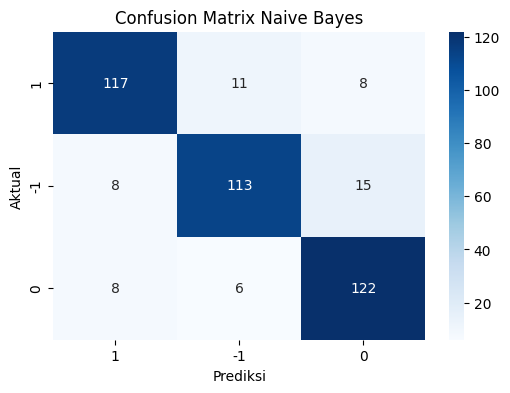

In [ ]:
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def load_predictions(file_path):
    """
    Muat label asli dan label prediksi dari file CSV
    """
    true_labels = []
    pred_labels = []

    with open(file_path, 'r', encoding='utf-8') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Lewati header
        for row in csv_reader:
            if len(row) < 3:
                continue  # Lewati baris tidak valid
            true_labels.append(row[1])  # Label Asli
            pred_labels.append(row[2])  # Label Prediksi

    return true_labels, pred_labels

def plot_confusion_matrix(true_labels, pred_labels):
    """
    Plot confusion matrix menggunakan heatmap seaborn
    """
    labels = ["1", "-1", "0"]  # Urutan sesuai permintaan
    cm = confusion_matrix(true_labels, pred_labels, labels=labels)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Prediksi")
    plt.ylabel("Aktual")
    plt.title("Confusion Matrix Naive Bayes")
    plt.show()

def main():
    input_file = "Prediksi_Naive_Bayes.csv"  # Sesuaikan dengan nama file hasil prediksi
    try:
        true_labels, pred_labels = load_predictions(input_file)

        # Hitung Confusion Matrix
        print("Confusion Matrix:")
        cm = confusion_matrix(true_labels, pred_labels, labels=["1", "-1", "0"])
        print(cm)

        # Hitung dan tampilkan akurasi
        accuracy = accuracy_score(true_labels, pred_labels)
        print(f"Accuracy: {accuracy:.2%}")

        # Gunakan `zero_division=1` agar tidak ada peringatan
        print("Classification Report:")
        print(classification_report(true_labels, pred_labels, labels=["1", "-1", "0"], zero_division=1))

        # Tampilkan plot confusion matrix
        plot_confusion_matrix(true_labels, pred_labels)

    except FileNotFoundError:
        print(f"Error: File {input_file} not found.")
    except Exception as e:
        print(f"Error: {str(e)}")

if __name__ == "__main__":
    main()

Jumlah prediksi:
Positif (1): 133
Negatif (-1): 130
Netral (0): 145


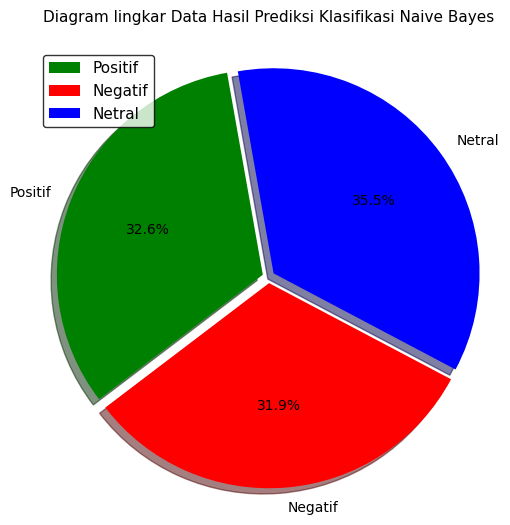

In [ ]:
# Load data CSV
data = pd.read_csv("Prediksi_Naive_Bayes.csv")

# Pastikan kolom 'Prediksi' bertipe data numerik
data['Prediksi'] = pd.to_numeric(data['Prediksi'], errors='coerce')  # Mengonversi ke numerik

# Menghitung jumlah prediksi positif, negatif, dan netral
prediksi_counts = data['Prediksi'].value_counts()

# Menampilkan hasil dalam format yang lebih terstruktur
print("Jumlah prediksi:")
print(f"Positif (1): {prediksi_counts.get(1, 0)}")    # Positif
print(f"Negatif (-1): {prediksi_counts.get(-1, 0)}")  # Negatif
print(f"Netral (0): {prediksi_counts.get(0, 0)}")    # Netral

# Data untuk diagram lingkaran
labels = ['Positif', 'Negatif', 'Netral']
sizes = [prediksi_counts.get(1, 0), prediksi_counts.get(-1, 0), prediksi_counts.get(0, 0)]
colors = ["green", "red", "blue"]
explode = [0.03] * len(labels)  # Membuat setiap bagian sedikit terpisah

# Membuat diagram lingkaran
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=100)  # Menebalkan sedikit teks pada label pie chart

# Menambahkan legenda untuk semua kategori dengan warna sesuai
plt.legend(
    labels=["Positif", "Negatif", "Netral"],
    loc="upper left",
    fontsize=11,
    frameon=True,
    edgecolor="black"
)

# Menambahkan keterangan bayangan dan pemisah
plt.title('Diagram lingkar Data Hasil Prediksi Klasifikasi Naive Bayes\n', fontsize=11)
plt.axis('equal')  # Membuat lingkaran sempurna

# Menampilkan diagram
plt.show()

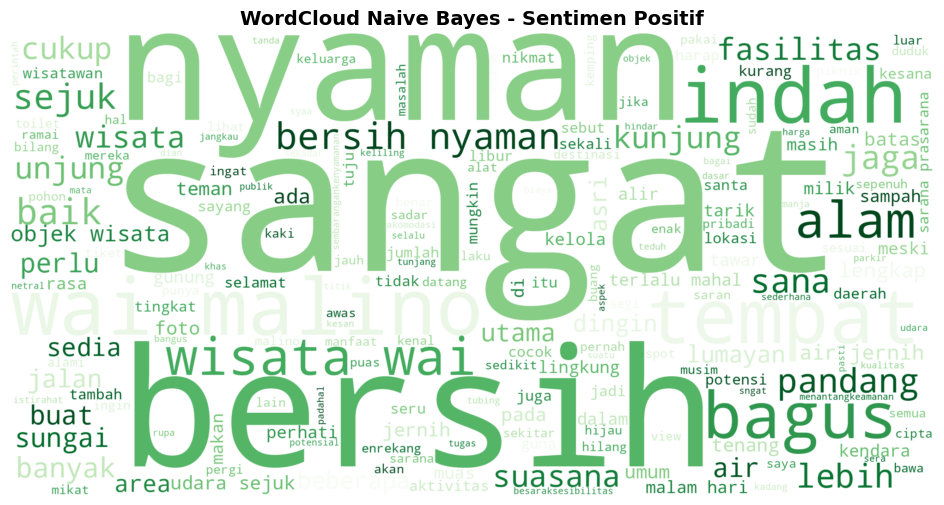

In [ ]:
#Visualisasi
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Load data CSV
data = pd.read_csv("Prediksi_Naive_Bayes.csv")

# Pastikan kolom "Teks" dan "Prediksi" tidak mengandung NaN atau error
data["Teks"] = data["Teks"].astype(str).fillna("")
data["Prediksi"] = data["Prediksi"].astype(str).str.strip().str.lower()

# Filter hanya data dengan sentimen positif
data_positif = data[data["Prediksi"] == "1"]

# Gabungkan semua teks dari sentimen positif
positif_words = " ".join(data_positif["Teks"])

# Buat WordCloud dari kata-kata positif
wordcloud = WordCloud(
    width=2000, height=1000,
    background_color="white",
    colormap="Greens",  # Warna hijau untuk positif
    stopwords=STOPWORDS
).generate(positif_words)

# Tampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud Naive Bayes - Sentimen Positif", fontsize=14, fontweight="bold")
plt.show()

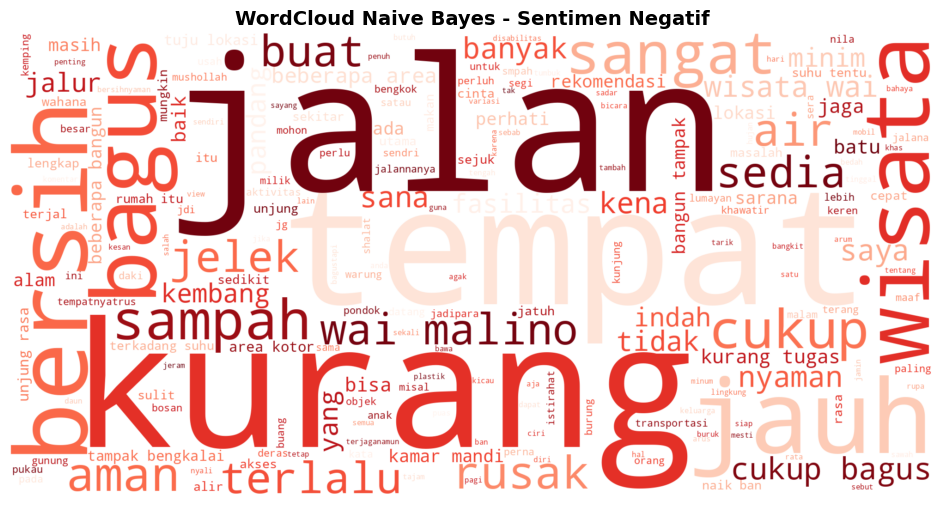

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Load data CSV
data = pd.read_csv("Prediksi_Naive_Bayes.csv")

# Pastikan kolom "Teks" dan "Prediksi" valid
data["Teks"] = data["Teks"].astype(str).fillna("")
data["Prediksi"] = data["Prediksi"].astype(str).str.strip()

# Filter hanya data dengan sentimen negatif (label -1)
data_negatif = data[data["Prediksi"] == "-1"]

# Gabungkan semua teks dari sentimen negatif
negatif_words = " ".join(data_negatif["Teks"])

# Buat WordCloud dari kata-kata negatif
wordcloud = WordCloud(
    width=2000, height=1000,
    background_color="white",
    colormap="Reds",  # Warna merah untuk negatif
    stopwords=STOPWORDS
).generate(negatif_words)

# Tampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud Naive Bayes - Sentimen Negatif", fontsize=14, fontweight="bold")
plt.show()

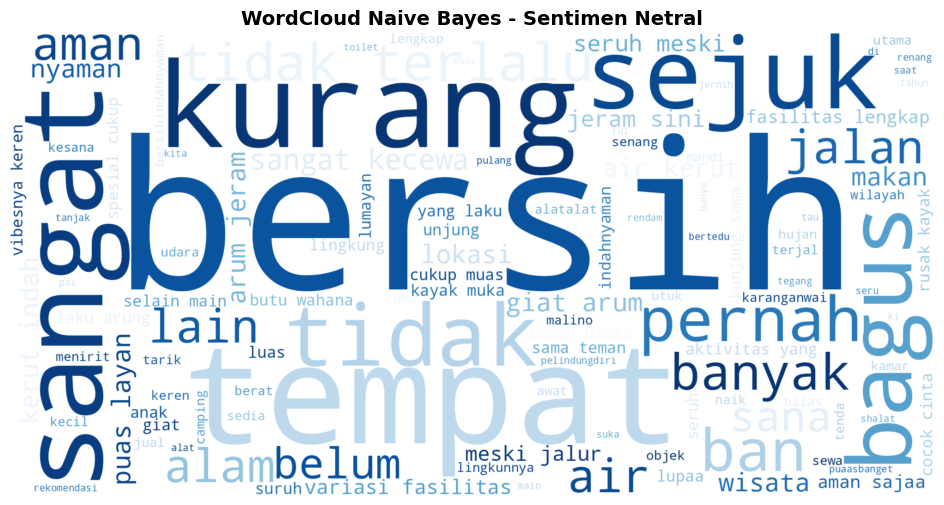

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Load data CSV
data = pd.read_csv("Prediksi_Naive_Bayes.csv")

# Pastikan kolom "Teks" dan "Prediksi" valid
data["Teks"] = data["Teks"].astype(str).fillna("")
data["Prediksi"] = data["Prediksi"].astype(str).str.strip()

# Filter hanya data dengan sentimen netral (label 0)
data_netral = data[data["Prediksi"] == "0"]

# Gabungkan semua teks dari sentimen netral
netral_words = " ".join(data_netral["Teks"])

# Buat WordCloud dari kata-kata netral
wordcloud = WordCloud(
    width=2000, height=1000,
    background_color="white",
    colormap="Blues",  # Warna biru untuk netral
    stopwords=STOPWORDS
).generate(netral_words)

# Tampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud Naive Bayes - Sentimen Netral", fontsize=14, fontweight="bold")
plt.show()

# Random Forest

In [ ]:
import csv
import numpy as np
import pandas as pd
from collections import Counter
import math
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [ ]:
# -------------------------------
# Fungsi untuk memuat data CSV
# -------------------------------
def load_csv_data(file_path, text_column, label_column):
    """
    Memuat data dari file CSV dan mengembalikan list teks dan label.
    """
    texts = []
    labels = []
    with open(file_path, 'r', encoding='utf-8') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            if row[text_column] and row[label_column]:
                texts.append(row[text_column])
                labels.append(int(row[label_column]))  # Pastikan label berupa integer
    return texts, labels

# -------------------------------
# Fungsi untuk menghitung entropi
# -------------------------------
def entropi(y):
    """
    Menghitung entropi dari vektor label y.
    """
    y = np.array(y) # y, array berisi nilai kelas atau label
    if len(y) == 0:
        return 0 # jika tdk ada data maka entropynya 0

    _, jumlah = np.unique(y, return_counts=True)
    # Menghitung probabilitas dari masing-masing label
    probabilitas = jumlah / len(y) # len(y) jumlah keseluruhan label

    # Rumus entropi: -∑ (p * log2(p))
    return -np.sum(probabilitas * np.log2(probabilitas))

# -------------------------------
# Fungsi untuk menghitung informasi Gini (menggunakan entropi)
# -------------------------------
def informasi_gini(y, y_kiri, y_kanan):
    entropi_awal = entropi(y)
    bobot_kiri = len(y_kiri) / len(y) # len(y) jumlah keseluruhan label
    bobot_kanan = len(y_kanan) / len(y)
    return entropi_awal - (bobot_kiri * entropi(y_kiri) + bobot_kanan * entropi(y_kanan))

# -------------------------------
# Fungsi untuk mencari pemisahan (split) terbaik
# x fitur dan y label
# -------------------------------
def cari_split_terbaik(X, y, jumlah_fitur_maks):
    jumlah_fitur = X.shape[1]
    indeks_fitur = np.random.choice(jumlah_fitur, size=jumlah_fitur_maks, replace=False) #memilih fitur secara acak
    fitur_terbaik = None
    ambang_terbaik = None
    gini_terbaik = 0 # menyimpan nilai Gini impurity tertinggi

    for fitur in indeks_fitur:
        ambang_list = np.unique(X[:, fitur])
        for ambang in ambang_list: #Loop lagi untuk mencoba semua ambang batas (threshold) dari fitur yang sedang diperiksa.
            indeks_kiri = X[:, fitur] <= ambang
            indeks_kanan = ~indeks_kiri

            if np.sum(indeks_kiri) == 0 or np.sum(indeks_kanan) == 0:
                continue #Jika nilainya kosong maka di lewati

            #untuk menghitung nilai Gini impurity dari pembagian kiri-kanan tersebut.
            gini = informasi_gini(y, y[indeks_kiri], y[indeks_kanan])
            if gini > gini_terbaik:
                gini_terbaik = gini
                fitur_terbaik = fitur
                ambang_terbaik = ambang

    return fitur_terbaik, ambang_terbaik

# -------------------------------
# Fungsi untuk membangun pohon keputusan (Decision Tree) secara rekursif
# -------------------------------
def bangun_pohon_keputusan(X_latih, y_latih, batas_kedalaman=None, jumlah_fitur_maks=None):
    # Inisialisasi pohon sebagai dictionary untuk menyimpan informasi
    pohon = {'fitur': None, 'ambang': None, 'kiri': None, 'kanan': None, 'label': None}

    # nilai kedalaman o maka berhenti & label nya akan terbentuk
    if batas_kedalaman == 0 or len(set(y_latih)) == 1: #panjang 1 maka kelasnya sama
        pohon['label'] = Counter(y_latih).most_common(1)[0][0] # mengambil label yang paling sering muncul.
        return pohon

    # Tentukan jumlah fitur maksimal
    if jumlah_fitur_maks is None:
        jumlah_fitur_maks = int(np.sqrt(X_latih.shape[1]))  # Default

    # mencari fitur terbaik dan ambang batasnya (nilai threshold)
    fitur_terbaik, ambang_terbaik = cari_split_terbaik(X_latih, y_latih, jumlah_fitur_maks)
    if fitur_terbaik is None: #Jika tidak ditemukan fitur terbaik untuk membagi data, maka simpul pohon berhenti.&
        pohon['label'] = Counter(y_latih).most_common(1)[0][0] # mengambil label yang paling sering muncul.
        return pohon

    # membagi data menjadi dua
    indeks_kiri = X_latih[:, fitur_terbaik] <= ambang_terbaik
    indeks_kanan = ~indeks_kiri

    #batas kedaaman - 1 ialah kurangi 1 setiap kali turun ke cabang berikutnya,
    pohon['fitur'] = fitur_terbaik
    pohon['ambang'] = ambang_terbaik
    pohon['kiri'] = bangun_pohon_keputusan(X_latih[indeks_kiri], np.array(y_latih)[indeks_kiri],
                                           batas_kedalaman - 1 if batas_kedalaman is not None else None,
                                           jumlah_fitur_maks)
    pohon['kanan'] = bangun_pohon_keputusan(X_latih[indeks_kanan], np.array(y_latih)[indeks_kanan],
                                            batas_kedalaman - 1 if batas_kedalaman is not None else None,
                                            jumlah_fitur_maks)

    return pohon

# -------------------------------
# Fungsi prediksi dengan pohon keputusan
# -------------------------------
def prediksi_pohon(pohon, x):
    if pohon['label'] is not None: #Jika node ini adalah daun (leaf), langsung kembalikan label prediksinya.
        return pohon['label']
    if pohon['fitur'] is None or pohon['ambang'] is None: #Jika struktur node tidak lengkap maka kembali ke node
        return None
    if x[pohon['fitur']] <= pohon['ambang']:
        return prediksi_pohon(pohon['kiri'], x) # x adalah satu data input yg ingin di prediksi
    else:
        return prediksi_pohon(pohon['kanan'], x)

# -------------------------------
# Fungsi pelatihan Random Forest
# -------------------------------
def latih_random_forest(X_latih, y_latih, jumlah_pohon=10, kedalaman_maks=None):
    hutan = [] #menyimpan pohon-pohon keputusan

    # Loop untuk membuat pohon keputusan sebanyak jumlah_pohon
    for _ in range(jumlah_pohon):
        # Mengambil sampel acak dengan pengembalian
        indeks = np.random.choice(len(X_latih), size=len(X_latih), replace=True)

        # Membuat subset data latih berdasarkan indeks yang dipilih
        X_subset = X_latih[indeks]
        y_subset = np.array(y_latih)[indeks]

        # Membangun pohon keputusan untuk subset yang telah diambil
        pohon = bangun_pohon_keputusan(X_subset, y_subset, kedalaman_maks)
        hutan.append(pohon) #  # Menyimpan pohon yang telah dibangun ke dalam list hutan
    return hutan

# -------------------------------
# Fungsi prediksi dengan Random Forest
# -------------------------------
def prediksi_random_forest(hutan, X_uji):
    prediksi = [] #menyimpan prediksi
    for x in X_uji: #prediksi untuk setiap x, yaitu satu data uji.
        prediksi_pohon_list = [prediksi_pohon(pohon, x) for pohon in hutan] #Memanggil fungsi untuk setiap pohon dalam hutan
        mayoritas = Counter(prediksi_pohon_list).most_common(1)[0][0] #  mencari label
        prediksi.append(mayoritas) # majority voting
    return prediksi

# -------------------------------
# Program Utama
# -------------------------------
def main():
    # Nama file data training dan testing
    train_file = "train_data.csv"  # File training sudah tersedia
    test_file = "test_data.csv"    # File testing sudah tersedia
    text_column = "Stemming"
    label_column = "Label"

    # Muat data training dan testing
    train_texts, train_labels = load_csv_data(train_file, text_column, label_column)
    test_texts, test_labels = load_csv_data(test_file, text_column, label_column)

    # Hitung TF-IDF menggunakan CountVectorizer dan TfidfTransformer
    count_vectorizer = CountVectorizer()
    train_counts = count_vectorizer.fit_transform(train_texts)
    test_counts = count_vectorizer.transform(test_texts)
    fitur = count_vectorizer.get_feature_names_out()

    tfidf_transform = TfidfTransformer()
    train_tfidf = tfidf_transform.fit_transform(train_counts).toarray()
    test_tfidf = tfidf_transform.transform(test_counts).toarray()

    # Tampilkan contoh hasil TF-IDF dalam DataFrame
    df_tfidf = pd.DataFrame(data=train_tfidf, columns=fitur)

    # Melatih Random Forest menggunakan implementasi manual
    trees = latih_random_forest(train_tfidf, np.array(train_labels), jumlah_pohon=10, kedalaman_maks=5)

    # Melakukan prediksi pada data testing
    predictions = prediksi_random_forest(trees, test_tfidf)
    accuracy = np.mean(np.array(predictions) == np.array(test_labels)) * 100
    print(f"Accuracy: {accuracy:.2f}%")

    # Simpan hasil prediksi beserta label aktual dan kolom 'Stemming' ke file CSV
    predictions_df = pd.DataFrame({
        "Komentar": test_texts,
        "Actual": test_labels,
        "Prediksi": predictions
    })

    predictions_df.to_csv("Random_Forest.csv", index=False)

if __name__ == "__main__":
    main()

Accuracy: 61.76%


Confusion Matrix:
[[98  6 32]
 [19 58 59]
 [29 11 96]]
Accuracy: 61.76%
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.72      0.70       136
          -1       0.77      0.43      0.55       136
           0       0.51      0.71      0.59       136

    accuracy                           0.62       408
   macro avg       0.65      0.62      0.61       408
weighted avg       0.65      0.62      0.61       408



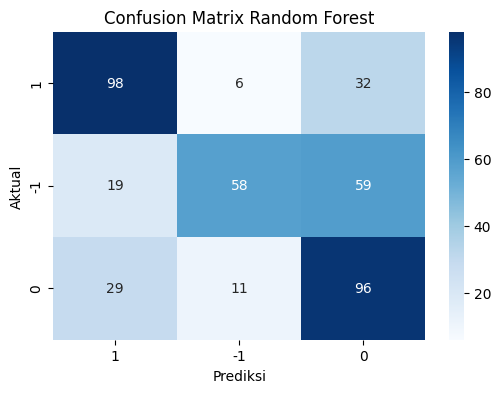

In [ ]:
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def load_predictions(file_path):
    """
    Muat label asli dan label prediksi dari file CSV
    """
    true_labels = []
    pred_labels = []

    with open(file_path, 'r', encoding='utf-8') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Lewati header
        for row in csv_reader:
            if len(row) < 3:
                continue  # Lewati baris tidak valid
            true_labels.append(row[1])  # Label Asli
            pred_labels.append(row[2])  # Label Prediksi

    return true_labels, pred_labels

def plot_confusion_matrix(true_labels, pred_labels):
    """
    Plot confusion matrix menggunakan heatmap seaborn
    """
    labels = ["1", "-1", "0"]  # Urutan sesuai permintaan
    cm = confusion_matrix(true_labels, pred_labels, labels=labels)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Prediksi")
    plt.ylabel("Aktual")
    plt.title("Confusion Matrix Random Forest")
    plt.show()

def main():
    input_file = "Random_Forest.csv"  # Sesuaikan dengan nama file hasil prediksi
    try:
        true_labels, pred_labels = load_predictions(input_file)

        # Hitung Confusion Matrix
        print("Confusion Matrix:")
        cm = confusion_matrix(true_labels, pred_labels, labels=["1", "-1", "0"])
        print(cm)

        # Hitung dan tampilkan akurasi
        accuracy = accuracy_score(true_labels, pred_labels)
        print(f"Accuracy: {accuracy:.2%}")

        # Gunakan `zero_division=1` agar tidak ada peringatan
        print("Classification Report:")
        print(classification_report(true_labels, pred_labels, labels=["1", "-1", "0"], zero_division=1))

        # Tampilkan plot confusion matrix
        plot_confusion_matrix(true_labels, pred_labels)

    except FileNotFoundError:
        print(f"Error: File {input_file} not found.")
    except Exception as e:
        print(f"Error: {str(e)}")

if __name__ == "__main__":
    main()

Jumlah prediksi:
Positif (1): 146
Negatif (-1): 75
Netral (0): 187


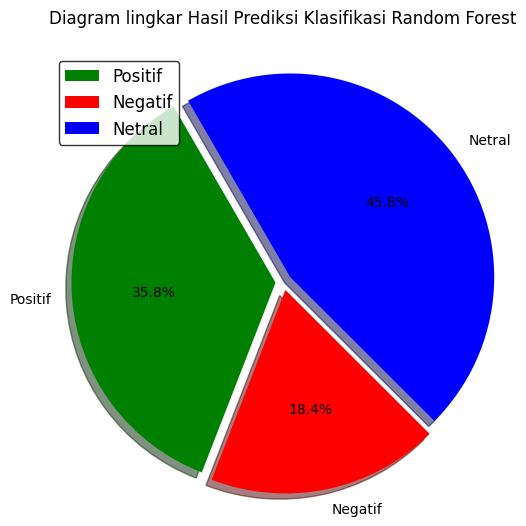

In [ ]:
# Load data CSV
data = pd.read_csv("Random_Forest.csv")

# Pastikan kolom 'Prediksi' bertipe data numerik
data['Prediksi'] = pd.to_numeric(data['Prediksi'], errors='coerce')  # Mengonversi ke numerik

# Menghitung jumlah prediksi positif, negatif, dan netral
prediksi_counts = data['Prediksi'].value_counts()

# Menampilkan hasil dalam format yang lebih terstruktur
print("Jumlah prediksi:")
print(f"Positif (1): {prediksi_counts.get(1, 0)}")    # Positif
print(f"Negatif (-1): {prediksi_counts.get(-1, 0)}")  # Negatif
print(f"Netral (0): {prediksi_counts.get(0, 0)}")    # Netral

# Data untuk diagram lingkaran
labels = ['Positif', 'Negatif', 'Netral']
sizes = [prediksi_counts.get(1, 0), prediksi_counts.get(-1, 0), prediksi_counts.get(0, 0)]
colors = ["green", "red", "blue"]
explode = [0.04] * len(labels)  # Membuat setiap bagian sedikit terpisah

# Membuat diagram lingkaran
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=120)  # Menebalkan sedikit teks pada label pie chart

# Menambahkan legenda untuk semua kategori dengan warna sesuai
plt.legend(
    labels=["Positif", "Negatif", "Netral"],
    loc="upper left",
    fontsize=12,
    frameon=True,
    edgecolor="black"
)

# Menambahkan keterangan bayangan dan pemisah
plt.title('Diagram lingkar Hasil Prediksi Klasifikasi Random Forest\n', fontsize=12)
plt.axis('equal')  # Membuat lingkaran sempurna

# Menampilkan diagram
plt.show()

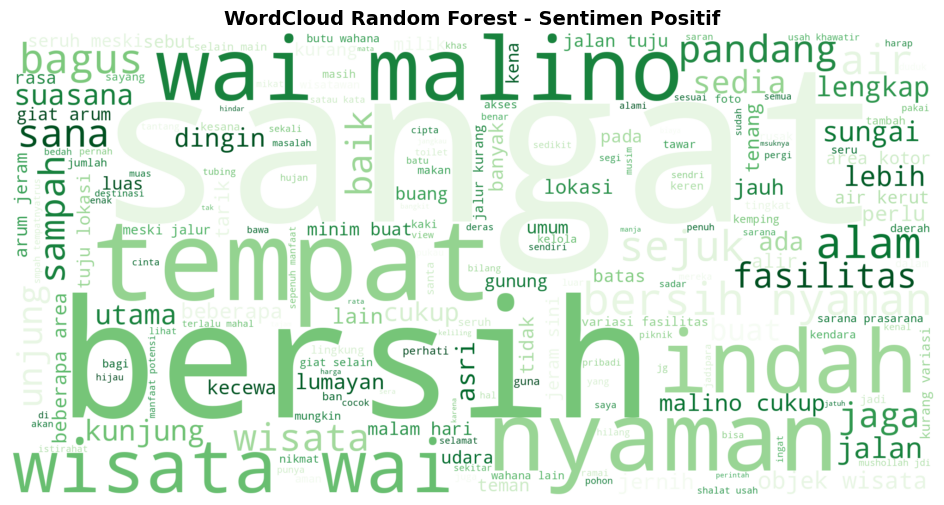

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Load data CSV
data = pd.read_csv("Random_Forest.csv")

# Pastikan kolom "Teks" dan "Prediksi" tidak mengandung NaN atau error
data["Komentar"] = data["Komentar"].astype(str).fillna("")
data["Prediksi"] = data["Prediksi"].astype(str).str.strip().str.lower()

# Filter hanya data dengan sentimen positif
data_positif = data[data["Prediksi"] == "1"]

# Gabungkan semua teks dari sentimen positif
positif_words = " ".join(data_positif["Komentar"])

# Buat WordCloud dari kata-kata positif
wordcloud = WordCloud(
    width=2000, height=1000,
    background_color="white",
    colormap="Greens",  # Warna hijau untuk positif
    stopwords=STOPWORDS
).generate(positif_words)

# Tampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud Random Forest - Sentimen Positif", fontsize=14, fontweight="bold")
plt.show()

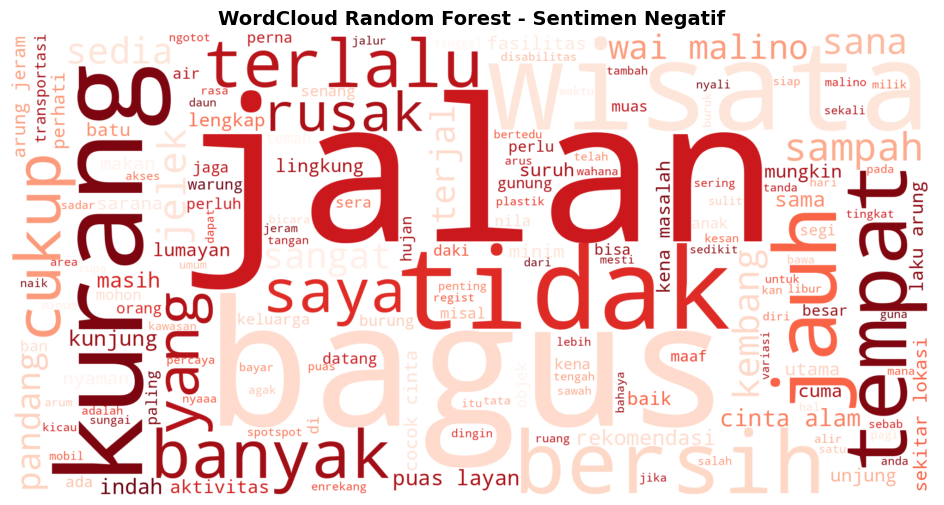

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Load data CSV
data = pd.read_csv("Random_Forest.csv")

# Pastikan kolom "Teks" dan "Prediksi" valid
data["Komentar"] = data["Komentar"].astype(str).fillna("")
data["Prediksi"] = data["Prediksi"].astype(str).str.strip()

# Filter hanya data dengan sentimen negatif (label -1)
data_negatif = data[data["Prediksi"] == "-1"]

# Gabungkan semua teks dari sentimen negatif
negatif_words = " ".join(data_negatif["Komentar"])

# Buat WordCloud dari kata-kata negatif
wordcloud = WordCloud(
    width=2000, height=1000,
    background_color="white",
    colormap="Reds",  # Warna merah untuk negatif
    stopwords=STOPWORDS
).generate(negatif_words)

# Tampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud Random Forest - Sentimen Negatif", fontsize=14, fontweight="bold")
plt.show()

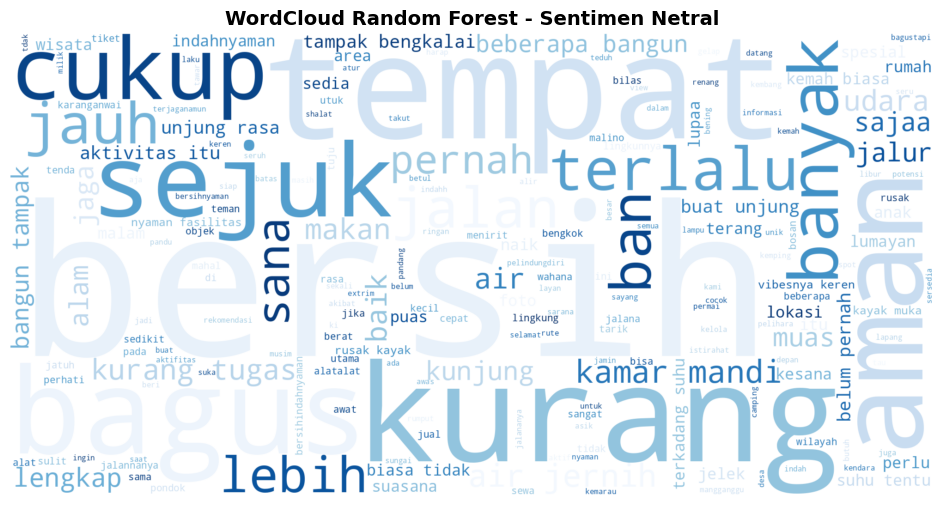

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Load data CSV
data = pd.read_csv("Random_Forest.csv")

# Pastikan kolom "Teks" dan "Prediksi" valid
data["Kometar"] = data["Komentar"].astype(str).fillna("")
data["Prediksi"] = data["Prediksi"].astype(str).str.strip()

# Filter hanya data dengan sentimen netral (label 0)
data_netral = data[data["Prediksi"] == "0"]

# Gabungkan semua teks dari sentimen netral
netral_words = " ".join(data_netral["Komentar"])

# Buat WordCloud dari kata-kata netral
wordcloud = WordCloud(
    width=2000, height=1000,
    background_color="white",
    colormap="Blues",  # Warna biru untuk netral
    stopwords=STOPWORDS
).generate(netral_words)

# Tampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud Random Forest - Sentimen Netral", fontsize=14, fontweight="bold")
plt.show()